##Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

##Loading model

In [2]:
cnn = tf.keras.models.load_model('trained_model.h5')

##Visualising and Performing Prediction on Single image

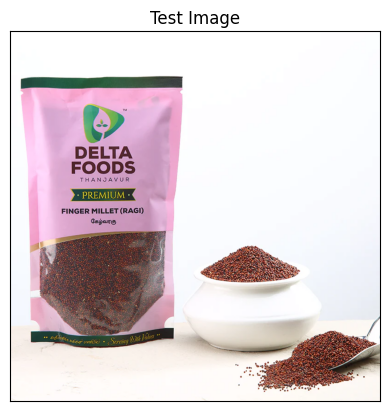

In [4]:
#Test Image Visualization
import cv2
image_path = 'millets3/test/Finger_millet/img3.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 400ms/step


In [6]:
print(predictions)

[[1.9755368e-14 1.5049254e-18 1.0000000e+00 2.0023301e-18 6.4215823e-16
  9.5970017e-17 5.2835107e-19 8.5953777e-18]]


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'millets3/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 160 files belonging to 8 classes.


In [9]:
test_set.class_names

['Amaranth_millet',
 'Buckwheat_millet',
 'Finger_millet',
 'Foxtail_millet',
 'KonkanRedRice',
 'Little_millet',
 'Pearl_millet',
 'Sorghum_millet']

In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


2


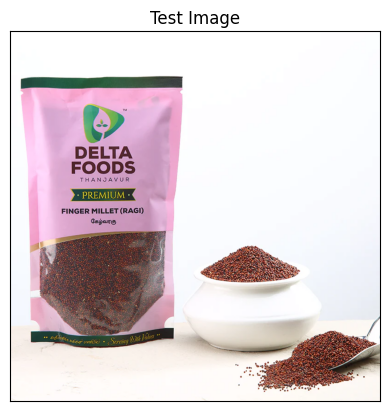

In [11]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [12]:
#Single image Prediction
print("The millet is {}".format(test_set.class_names[result_index]))

The millet is Finger_millet


In [13]:
test_set.class_names

['Amaranth_millet',
 'Buckwheat_millet',
 'Finger_millet',
 'Foxtail_millet',
 'KonkanRedRice',
 'Little_millet',
 'Pearl_millet',
 'Sorghum_millet']

In [14]:
file=open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+'\n')
file.close()

In [15]:
with open("labels.txt") as f:
  content= f.readlines()

In [16]:
content

['Amaranth_millet\n',
 'Buckwheat_millet\n',
 'Finger_millet\n',
 'Foxtail_millet\n',
 'KonkanRedRice\n',
 'Little_millet\n',
 'Pearl_millet\n',
 'Sorghum_millet\n']

In [17]:
l= []
for i in content:
  l.append(i[:-1])